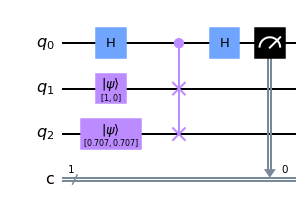

In [1]:
# 3.1 SWAP test
import numpy as np
from qiskit import *
%matplotlib inline
from qiskit.visualization import plot_histogram
from math import pi

# SWAP test

# create the full circuit
a=np.array([1.,0.])
b=np.array([1./np.sqrt(2.),1./np.sqrt(2.)])

qr=QuantumRegister(3,'q')
cr=ClassicalRegister(1,'c')

circuit = QuantumCircuit(qr,cr)
circuit.initialize(a,[1])
circuit.initialize(b,[2])
circuit.h(0)
circuit.cswap(qr[0], qr[1], qr[2])
circuit.h(0)

circuit.measure(range(1),range(1))
circuit.draw('mpl')



<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


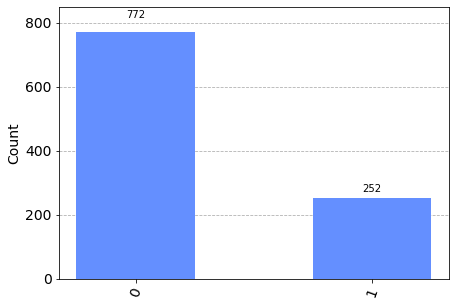

In [2]:

# result and city diagram 
backend = Aer.get_backend('statevector_simulator')
job = execute(circuit, backend, shots=1024)
result = job.result()
counts = result.get_counts(circuit)
plot_histogram(counts)




In [3]:

# printout inner product
print('|<a|b>|**2=',(counts['0']-counts['1'])/1024)


|<a|b>|**2= 0.5078125
